In [76]:
import numpy as np
import pandas as pd
from random import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [133]:
nod= 1000
I = 0.003125                # Moment of Inertia (in m^4)
E = 203 * (10**9)           # Young's modulus of material
print("Enter the magnitude of force applied on the beam (in Newton): ")
F= float(input())             # Force on the beam
print("Enter the length of the beam(in metres): ")
L= float(input())

Enter the magnitude of force applied on the beam (in Newton): 
25500
Enter the length of the beam(in metres): 
2.5


In [134]:
def diff(a,b):
    if(a<=b):
        return 0
    else:
        return (a-b)

In [135]:
def evaluate(a,b):
    l= ((a**2)*b)/2
    m= (a**(3))/6
    return (l-m)

In [136]:
def net_deflection(a,b):
    x= evaluate(a,b) + ((diff(a,b)**3)/6)
    x= (-F/(E*I))*x
    return x

In [137]:
def find_min_tens(max):
  if(max<=1):
    return 1
    
  for i in range(1,100):
    if((10*i)>=max):
      return (10*i)
    

## **Neural Network**

In [138]:
class Neural_Network(object):

    def __init__(self, num_inputs=3, hidden_layers=[3, 3], num_outputs=2):

        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs

        # create a generic representation of the layers
        layers = [num_inputs] + hidden_layers + [num_outputs]

        # create random connection weights for the layers
        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        # save derivatives per layer
        derivatives = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            derivatives.append(d)
        self.derivatives = derivatives

        # save activations per layer
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations


    def forward_propagate(self, inputs):

        # the input layer activation is just the input itself
        activations = inputs

        # save the activations for backpropogation
        self.activations[0] = activations

        # iterate through the network layers
        for i, w in enumerate(self.weights):
            # calculate matrix multiplication between previous activation and weight matrix
            net_inputs = np.dot(activations, w)

            # apply sigmoid activation function
            activations = self._sigmoid(net_inputs)

            # save the activations for backpropogation
            self.activations[i + 1] = activations

        # return output layer activation
        return activations


    def back_propagate(self, error):

        # iterate backwards through the network layers
        for i in reversed(range(len(self.derivatives))):

            # get activation for previous layer
            activations = self.activations[i+1]

            # apply sigmoid derivative function
            delta = error * self._sigmoid_derivative(activations)

            # reshape delta as to have it as a 2d array
            delta_re = delta.reshape(delta.shape[0], -1).T

            # get activations for current layer
            current_activations = self.activations[i]

            # reshape activations as to have them as a 2d column matrix
            current_activations = current_activations.reshape(current_activations.shape[0],-1)

            # save derivative after applying matrix multiplication
            self.derivatives[i] = np.dot(current_activations, delta_re)

            # backpropogate the next error
            error = np.dot(delta, self.weights[i].T)


    def train(self, inputs, targets, epochs, learning_rate):
        
        # now enter the training loop
        for i in range(epochs):
            sum_errors = 0

            # iterate through all the training data
            for j, inputt in enumerate(inputs):
                target = targets[j]

                # activate the network!
                output = self.forward_propagate(inputt)

                error = target - output

                self.back_propagate(error)

                # now perform gradient descent on the derivatives
                # (this will update the weights
                self.gradient_descent(learning_rate)

                # keep track of the MSE for reporting later
                sum_errors += self._mse(target, output)


        print("Training complete!")
        print("=====")
        return sum_errors

    def gradient_descent(self, learningRate=1):
    
        # update the weights by stepping down the gradient
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * learningRate

    # tanh function
    def tanh(self, x):
        return ((2/(1+np.exp(-2*x)))-1)

    # derivative of tanh function
    def tanh_derivative(self, x):
        return (1-(x**2))

    def _sigmoid(self, x):
        y = 1.0 / (1 + np.exp(-x))
        return y


    def _sigmoid_derivative(self, x):
        return x * (1.0 - x)


    def _mse(self, target, output):
        return np.average((target - output) ** 2)

In [139]:
if __name__ == "__main__":

    # create a dataset to train a network for the difference operation
    items = np.array([[random()/2 for _ in range(2)] for _ in range(nod)])
    
    difference = np.array([[diff(i[0] , i[1])] for i in items])
    
    # NN with one hidden layer and 18 nodes
    mlp = Neural_Network(2, [18], 1)
    
    # training the network
    mse= mlp.train(items, difference, 150, 0.1)
    print("MSE= ",mse)

Training complete!
=====
MSE=  0.6142863805714504


# **Polynomial Regression**

In [158]:
def polynomial_regression(distx,y):
    dist_x = np.linspace(0.0001,1,100)
    deflection = []
    for i in range(100):
        deflection.append(evaluate(dist_x[i],y))
    
    deflection = np.array(deflection).reshape(100,1)
    net_output = deflection

    partial_formula = np.array([[i[0]] for i in items])
    degree= 3
    # Degree of polynomial can be changed as per our requirement
    x= partial_formula
    for i in range(2,degree+1):
        x= np.concatenate((x,partial_formula**(i)),axis=1)

    x= np.concatenate((np.ones((100,1)),x),axis= 1)     # adding bias
    
    # calculating the coefficients of polynomial
    inverse_mat= np.linalg.inv(np.dot(x.T,x))
    coeff= np.dot(inverse_mat,x.T)          
    coeff= np.dot(coeff,net_output)
    
    # get a prediction of polynomial part using regression
    func=list()
    for i in range(1,degree+1):
        func.append(distx**i)

    func= np.array(func).reshape((1,degree))
    func= np.concatenate((np.ones((1,1)),func),axis= 1)
    output1= np.dot(coeff.T,func.T)
    
    return output1[0,0]

In [150]:
def polynomial_regression_with_library(x,y):
  deg= 3
  nod = 15
  dist_x = np.linspace(0.0001,1,nod)
  deflection = []
  for i in range(nod):
      deflection.append(evaluate(dist_x[i],y))

  dist_x = np.array(dist_x).reshape(nod,1)

  poly = PolynomialFeatures(degree=deg)
  x_poly = poly.fit_transform(dist_x)
  poly.fit(x_poly,deflection)

  model = LinearRegression()
  model.fit(x_poly, deflection)

  x_new= [[1,x,x**2,x**3]]
  predicted_answer = model.predict(arr)
  prediction = model.predict(x_poly)

  plt.scatter(dist_x,deflection,color= "red")
  plt.plot(dist_x,prediction,color= "blue")
  plt.title("Polynomial regression")
  return predicted_answer[0]

# **Prediction**

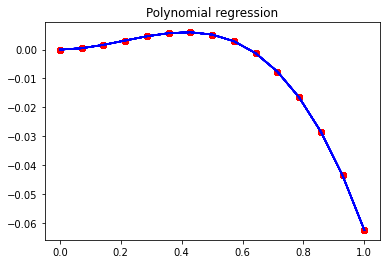

In [160]:
# distance where you want to know the deflection
dist_x = np.linspace(0,L,20)
distx = 0.967

# distance where force is applied on the beam
y = 5*L/6                            # <====================== Value of "y" can be changed from here
answer= []

accuracy_NN= 0
# predicting the deflection on the the beam at various point
for i in range(20):
  if(dist_x[i]>=y):
    max= dist_x[i]
  else:
    max= y

  temp = find_min_tens(max)
  a = dist_x[i]/temp
  b = y/temp

  # output from polynomial regression
  output_from_poly = polynomial_regression_with_library(a,b)
  output1 = output_from_poly

  # output from NN
  inputs = np.array([a,b])
  output_from_NN = mlp.forward_propagate(inputs)
  output2 = (output_from_NN[0]**3)/6
  accuracy_NN= accuracy_NN + (diff(a,b)-output_from_NN)
  
  net_ans = (-F/(E*I))*(output1+output2)*(temp**3)            # answer is the sum of polynomial regression output and neural ntwork output
  # saving the answer
  answer.append(net_ans)

accuracy_NN = accuracy_NN/20
predicted_answer= answer[::-1]
for i in range(20):
  predicted_answer[i]= -0.1*predicted_answer[i]



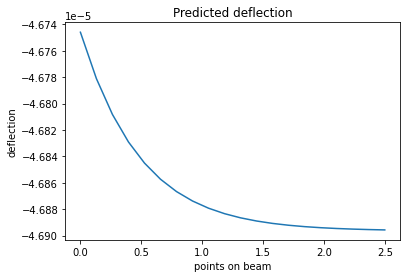

In [161]:
plt.plot(dist_x,predicted_answer)
plt.title("Predicted deflection")
plt.xlabel("points on beam")
plt.ylabel("deflection")
plt.show()

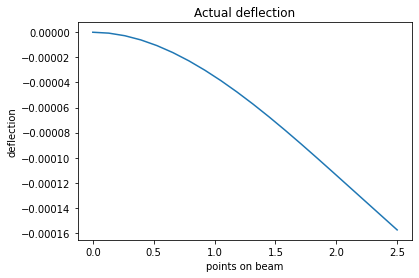

In [145]:
actual_answer= []

for i in range(20):
  actual_answer.append(net_deflection(dist_x[i],y))

plt.plot(dist_x,actual_answer)
plt.title("Actual deflection")
plt.xlabel("points on beam")
plt.ylabel("deflection")
plt.show()